<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/MetacodeM/blob/main/project_fraud_detection_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Index


1. loading python packages & Data
  * 1-1. loading python packages
  * 1-2. loading data
2. Exploratory Data Analysis
  * 2-1. Descriptive statistics
3. Data preparation
  * 3-1. missing value check
  * 3-2. Data visualization
  * 3-3. preparing data for classification
4. Logistic Regression
  * 4-1. parameter initialization
  * 4-2. hypothesis Define
  * 4-3. cost function define
  * 4-4. metric define
  * 4-5. hyper parameter setting
  * 4-6. training
  * 4-7. evaluate performance
5. Evaluate Algorithms and Models
  * 5-1. train test split
  * 5-2. checking models and algorithms
6. Model Tuning
  * 6-1. by choosing correct evaluation metric
  * 6-2. model tuning for balancing the sample by random under sampling




#1.Loading Python packages & Data

##1-1.Loading Python Packages

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import read_csv, set_option
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:
!pip install scikeras
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.optimizers import SGD

from pickle import dump, load


##1-2.Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/금융전략을 위한 머신러닝 Data/0. project_fraud detection/creditcard (1).csv',delimiter=',',dtype=np.float32)

In [ ]:
# diable the warnings
import warnings
warnings.filterwarnings('ignore')

#2.Exploratory Data Analysis

##2-1. Descriptive statistics

In [ ]:
# shape
dataset.shape

(284807, 31)

In [ ]:
#peek at data
set_option('display.width',100) # 출력 너비 조절
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


In [ ]:
#descibe data
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.867188,1.339397e-08,0.000000,-4.800400e-08,6.643411e-09,2.657364e-08,-1.500125e-09,-1.071518e-09,-1.071518e-10,-3.214554e-10,...,-1.928732e-09,3.643161e-09,3.214554e-10,1.259033e-09,2.143036e-09,1.034684e-09,1.138488e-10,-1.272427e-10,88.349609,0.001727
std,47488.144531,1.958696e+00,1.651309,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120117,0.041527
min,0.000000,-5.640751e+01,-72.715729,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-0.598550,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,0.065486,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097605e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,0.803724,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273458e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165001,0.000000
max,172792.000000,2.454930e+00,22.057730,9.382559e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519588e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160156,1.000000


In [ ]:
# null , types
set_option('display.max_rows',500)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float32
 1   V2      284807 non-null  float32
 2   V3      284807 non-null  float32
 3   V4      284807 non-null  float32
 4   V5      284807 non-null  float32
 5   V6      284807 non-null  float32
 6   V7      284807 non-null  float32
 7   V8      284807 non-null  float32
 8   V9      284807 non-null  float32
 9   V10     284807 non-null  float32
 10  V11     284807 non-null  float32
 11  V12     284807 non-null  float32
 12  V13     284807 non-null  float32
 13  V14     284807 non-null  float32
 14  V15     284807 non-null  float32
 15  V16     284807 non-null  float32
 16  V17     284807 non-null  float32
 17  V18     284807 non-null  float32
 18  V19     284807 non-null  float32
 19  V20     284807 non-null  float32
 20  V21     284807 non-null  float32
 21  V22     28

In [ ]:
class_names ={0:'Not Fraud',1:'Fraud'}
print (dataset.Class.value_counts().rename(index = class_names))

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


#3. Data Preparation

##3-1. Missing Value check

In [ ]:
print ('Null Values =',dataset.isnull().values.any())
# df.isnull().sum() / df.shape[0] # null 있는 경우 채워줌

Null Values = False


* missing value 없음 \
* data 이미 float 포맷이기 때문에 clean 이나 categorize 할 필요없음

##3-2. Data visualization

정상거래 99.82%, 이상거래 0.17% \
심각한 imbalance가 존재하는 dataset임. 주로 사용되는 Accuracy 를 사용해서 모델의 performance를 측정하기는 어려움. 모델을 설계할 때 precision, Recall, F1 score 사용하도록 디자인

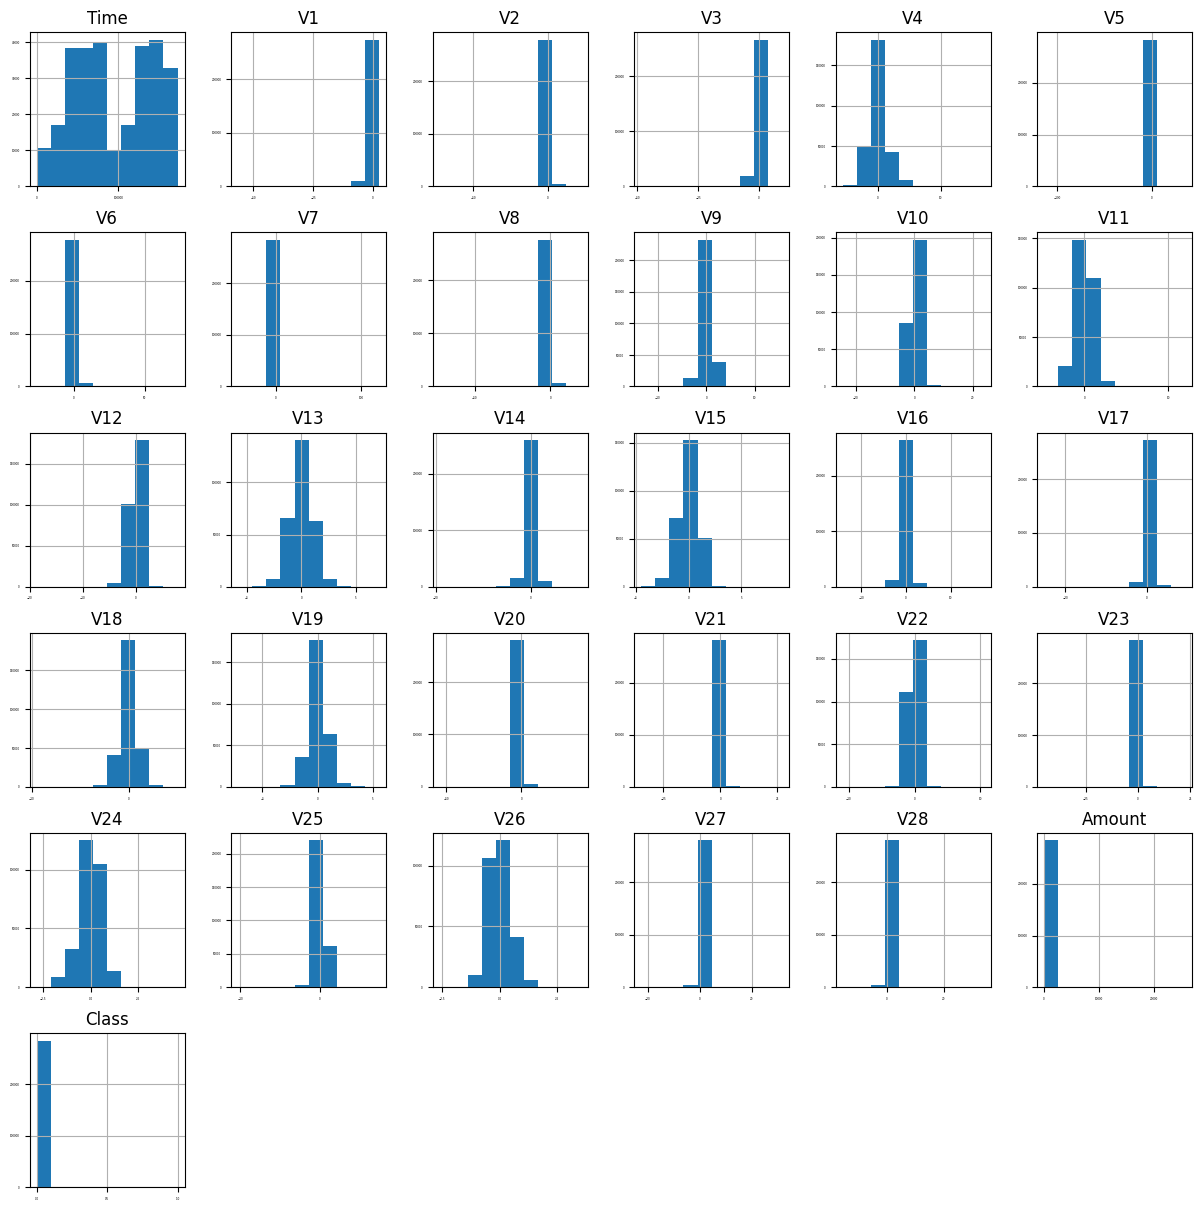

In [ ]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=2, ylabelsize=2, figsize=(15,15))
plt.show()

대부분의 분포가 한쪽으로 편중되어 있음 (skewed)  \
그러나 variables 이름을 알 수 없어서 plot 에 대한 많은 intuition 가질 수 없음

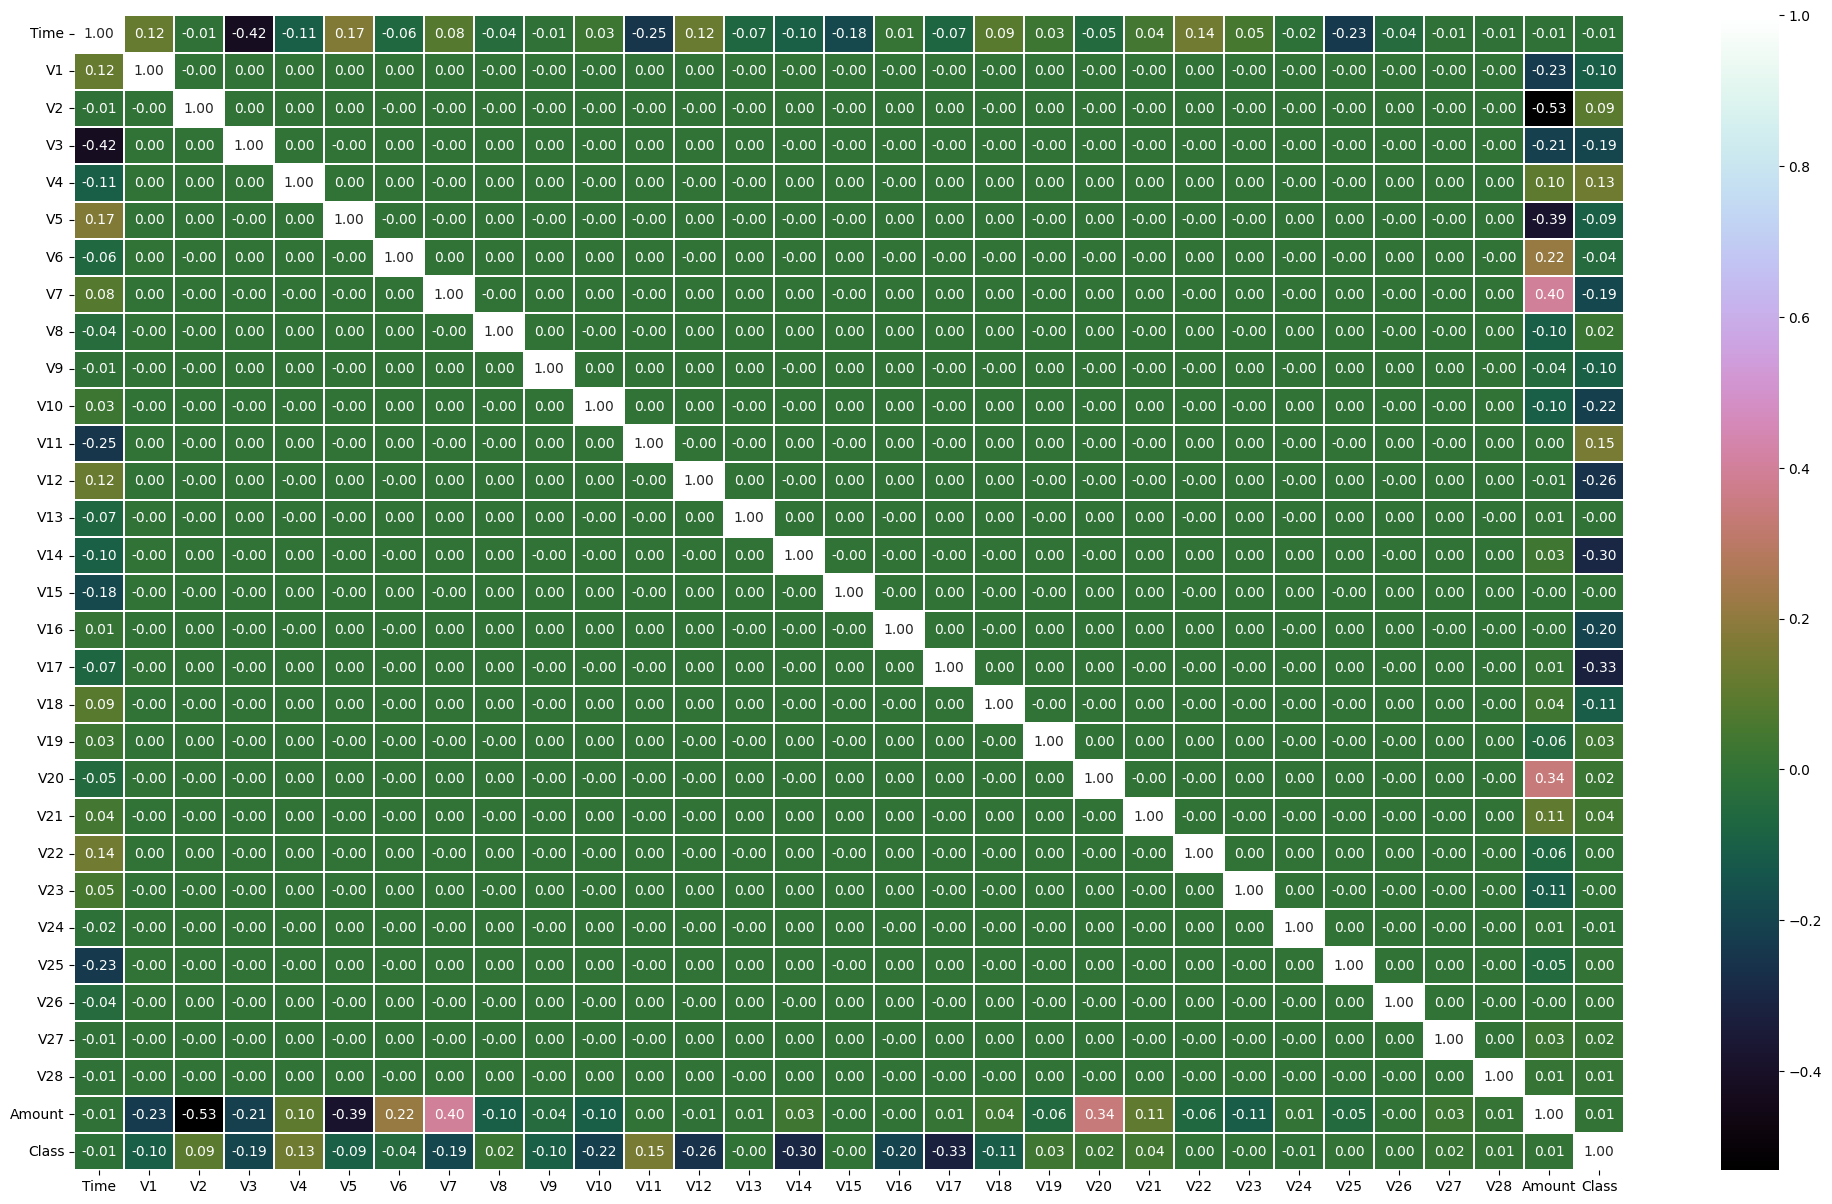

In [ ]:
# correlation
f, ax = plt.subplots(figsize=(25,15))
sns.heatmap(dataset.corr(),annot=True, linewidths=0.3, fmt ='0.2f', ax=ax, cmap='cubehelix')
plt.show()

feature들 간의 상관관계 확인함. 이 데이터는 이미 PCA 거친 데이터라서 상관관계 낮게 나옴 \
만약 높게 나오는 경우는 VIF를 통해 다중공선성 확인해주는 것이 좋음

##3-3. Preparing data for classification





In [ ]:
# 필요없는 feature 'Time' 제거
dataset.drop(columns = 'Time', inplace = True)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


In [ ]:
X = dataset.iloc[:,0:-1].values
Y = dataset.iloc[:,[-1]].values

X = np.array(X, dtype=np.float32)
Y = np.array(Y, dtype=np.float32)

print (X.shape, Y.shape)

(284807, 29) (284807, 1)


feature로 이루어진 x_data / label 나타내는 y_data로 원본 데이터 분리 \
분리된 데이터는 앞으로 계산해주어야 하기 때문에 동일 타입의 실수형 데이터로 저장

In [ ]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(k=10)
bestfeatures
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns[:-1])
# concat two dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['specs','score'] #naming the datframe columns
print (featureScores.nlargest(10,'score'))

   specs         score
16   V17  33981.799151
13   V14  28698.085787
11   V12  20751.504689
9    V10  14059.734604
15   V16  11444.329123
2     V3  11015.096687
6     V7  10350.650841
10   V11   6999.941407
3     V4   5164.070135
17   V18   3584.711511


몇몇 feature 는 연관성 있지만 눈에 띄는 정도의 선호는 없음

In [ ]:
# normalize
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print (X)

[[9.3519241e-01 7.6649040e-01 8.8136494e-01 ... 4.1897613e-01
  3.1269664e-01 5.8237929e-03]
 [9.7854203e-01 7.7006662e-01 8.4029853e-01 ... 4.1634512e-01
  3.1342265e-01 1.0470528e-04]
 [9.3521708e-01 7.5311762e-01 8.6814088e-01 ... 4.1548926e-01
  3.1191131e-01 1.4738923e-02]
 ...
 [9.9090487e-01 7.6407969e-01 7.8110206e-01 ... 4.1659316e-01
  3.1258485e-01 2.6421540e-03]
 [9.5420909e-01 7.7285570e-01 8.4958714e-01 ... 4.1851953e-01
  3.1524515e-01 3.8923896e-04]
 [9.4923186e-01 7.6525640e-01 8.4960151e-01 ... 4.1646636e-01
  3.1340083e-01 8.4464857e-03]]


데이터 scale 에 따라 결과 왜곡되는 것 방지하기 위해 MinMaxScaler 사용하여 데이터 값이 0-1 사이 지니도록 정규화

#4. Logistic Regression

##4-1. Parameter Intialization

In [ ]:
tf.random.set_seed(22)

W = tf.Variable(tf.random.normal([29,1],mean=0.0))
b = tf.Variable(tf.random.normal([1],mean=0.0))

W : 앞에는 input dimension, output dimension 으로 설정 \
b: output dimension 과 동일하게 설정

##4-2.Hypothesis Define

In [ ]:
def hypothesis (x):
  z = tf.matmul(x,W)+b
  sigmoid = 1/ (1+tf.exp(-z))
  return sigmoid

##4-3.Cost Function Define

In [ ]:
def cost_function (H,Y):
  cost = -tf.reduce_mean(Y*tf.math.log(H)+(1-Y)*tf.math.log(1-H))
  return cost

이진 분류에서 주로 사용되는 cross entropy를 cost function 으로 설정해줌

##4-4.Metric Define

In [ ]:
def accuracy(H,y):
  predicted = tf.cast(H>0.5, dtype=tf.float32)
  labels = tf.constant(y, dtype=tf.float32)
  accuracyd = tf.reduce_mean(tf.cast(tf.equal(predicted,labels),dtype=tf.float32))
  return accuracyd

##4-5. Hyper parameter setting

In [ ]:
learning_rate = 0.0001
optimizer = tf.optimizers.SGD (learning_rate)

##4-6. Training

In [ ]:
for step in range(400):
  with tf.GradientTape() as g:
    pred = hypothesis (X)
    cost = cost_function(pred,Y)

    gradient = g.gradient(cost, [W,b])
    optimizer.apply_gradients(zip(gradient, [W,b]))

  if step %200 ==0:
    print (f'step : {step}, loss : {cost.numpy()}')

w_hat = W.numpy()
b_hat = b.numpy()

step : 0, loss : 0.015813225880265236
step : 200, loss : 0.01580575853586197


##4-7. Evaluate Performance

In [ ]:
# accuracy
acc = accuracy (hypothesis(X),Y).numpy()
print (f'Accuracy :{acc}')

Accuracy :0.9982725381851196


정확도가 매우 높지만 불균형한 데이터이기 때문에 정확한 평가지표가 될 수 없음

In [ ]:
# precision, recall, F1 score
predicted_X = tf.cast(hypothesis(X)>0.5,dtype = tf.float32)
print ('Accuracy =',accuracy_score(predicted_X,Y))
print ('Report = \n',classification_report(predicted_X,Y))

Accuracy = 0.9982725143693799
Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    284807
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



logistic regression 모델을 평가해 봤을 떄 fraud Transaction을 거의 잡아내지 못하는 것을 알 수 있음 \
다른 모델을 통해 접근할 필요

#5.Evaluate Algorithms and Models

##5-1. Train Test Split

In [ ]:
#split the validation dataset for the end
Y = dataset['Class']
X = dataset.loc[:,dataset.columns != 'Class']
validation_size =0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=validation_size, random_state=seed)

In [ ]:
X_train.shape

(227845, 29)

##5-2. Checking Models and Algorithms

In [ ]:
# test options for classification
num_folds = 10
seed =7
scoring = 'f1'

F1-score을 평가 지표로 사용

In [ ]:
# Classification algorithms
models =[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
# models.append(('NB',GaussianNB))
# models.append(('SVM',SVC()))

# #neural network
# models.append(('NN',MLPClassifier()))

# # ensemble - boosting
# models.append(('AB',AdaBoostClassifier()))
# models.append(('GBM',GradientBoostingClassifier()))
# #ensemble - bagging
# models.append(('RF',RandomForestClassifier()))
# models.append(('ET',ExtraTreesClassifier()))

In [ ]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle =True, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
  results.append(cv_results)
  names.append(name)
  msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
  print (msg)

LR: 0.596378 (0.078310)
LDA: 0.797834 (0.049300)
KNN: 0.840041 (0.038527)


KeyboardInterrupt: 

In [ ]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
#prepare model
model = KNeighborsClassifier()
model.fit(X_train, Y_train)

In [ ]:
# estimate accuracy on validation set
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print (accuracy_score(Y_validation, predictions))
print (confusion_matrix(Y_validation, predictions))
print (classification_report(Y_validation, predictions))

In [ ]:
dataset_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index=np.unique(Y_validation))
dataset_cm.index.name = 'Actual'
dataset_cm.columns.name = 'Predicted'
sns.heatmap(dataset_cm, cmap= 'Blues', annot=True, annot_kws={'size': 16})

#6. Model Tuning

##6-1. Model tuning for balancing the sample by Random Under Sampling

In [ ]:
Y_train_df = pd.DataFrame(Y_train, columns =['Class'])
Y_train_df.head()

,Class
44828,0.0
221877,0.0
278826,0.0
149792,0.0
226041,0.0


In [ ]:
X_train_df = pd.DataFrame(X_train)
df = pd.concat([X_train_df, Y_train_df],axis=1)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class']==0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

#Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=42)

#split out validation dataset
Y_train_new = df_new['Class']
X_train_new = df_new.drop(columns=['Class'])

dataset.head()
print ("Class 분포:\n,",Y_train_new.value_counts())

Original non_fraud_df size: 492
Original fraud_df size: 392
Class 분포:
, Class
0.0    492
1.0    392
Name: count, dtype: int64


Distribution of the Classes in the subsample dataset
Class
0.0    0.556561
1.0    0.443439
Name: count, dtype: float64


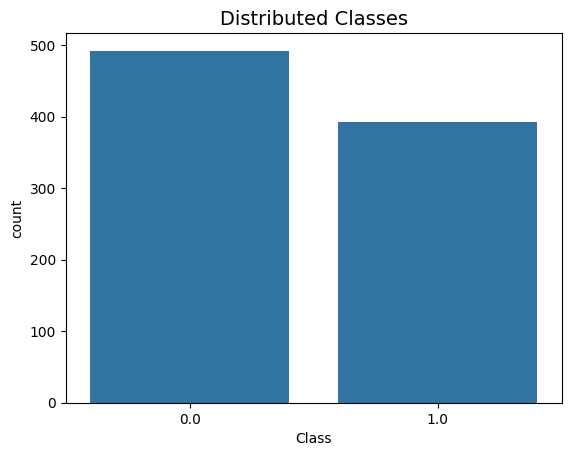

In [ ]:
print ('Distribution of the Classes in the subsample dataset')
print (df_new['Class'].value_counts()/len(df_new))
sns.countplot(x = 'Class', data=df_new)
plt.title( 'Distributed Classes', fontsize=14)
plt.show()

In [ ]:
scoring = 'accuracy'

In [ ]:
#spot check the algorithms
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Neural network
models.append(('NN',MLPClassifier()))

# ensemble
# boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM',GradientBoostingClassifier()))
# bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET',ExtraTreesClassifier()))

In [ ]:
# writing the deep learning classifier in case the deep learning flag is set to true
# set the following flag to 1 if the Deep learning models flag has to be enabled
EnableDLModelsFlag = 1
if EnableDLModelsFlag == 1:
  # function to create model, required for KerasClassifier
  def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim = X_train.shape[1], activation=activation))
    model.add(Dense(32, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))
    # compile model
    model.compile ( loss = 'binary_crossentropy',optimizer ='adam', metrics =['accuracy'])
    return model

models.append(('DNN', KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)))

In [ ]:
results=[]
names=[]
for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle =True, random_state=seed)
  cv_results = cross_val_score(model,X_train_new, Y_train_new, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = '{}: {} ({})'.format(name, cv_results.mean(), cv_results.std())
  print (msg)

LR: 0.946820735444331 (0.020252304117283744)
LDA: 0.9151302349336058 (0.02604148144768645)
KNN: 0.8981869254341163 (0.020947300509066288)
CART: 0.9061542390194077 (0.036579792115677315)
NB: 0.9196756894790601 (0.01640607422299897)
SVM: 0.8371424923391215 (0.0275127146832558)
NN: 0.9366062308478037 (0.021061320968152535)
AB: 0.9298646578140961 (0.03021912297888822)
GBM: 0.9366573033707866 (0.02483921291276362)
RF: 0.9400280898876405 (0.02585091196879708)
ET: 0.9468335035750768 (0.020178833974456883)
DNN: 0.9332609805924413 (0.027909396098598535)


In [ ]:
#compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

In [ ]:
# Grid Search: RandomForest Tuning
'''
n_estimators : int (default=100)
  The number of boosting stages to perform.
  Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default= 3)
  maximum depth of the indivudial regression estimators.
  The maximum depth limits the numer of nodes in the tree.
  Tune this pararmeter for best performance ; the best value depends on the interactoin of the input variables.
'''

n_estimators = [20,180,1000]
max_depth = [2,3,5]
param_grid = dict(n_estimators = n_estimators , max_depth= max_depth)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_new, Y_train_new)

# Print Results
print ('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
  print ('%d %f (%f) with %r' % (rank, mean, stdev, param))

In [ ]:
#prepare model
model = RandomForestClassifier(max_depth=5, n_estimators=180)
model.fit(X_train_new, Y_train_new)

In [ ]:
#estimate accuracy on Original validation set
predictions = model.predict(X_validation)
print (accuracy_score(Y_validation, predictions))
print (confusion_matrix(Y_validation, predictions))
print (classification_report(Y_validation, predictions))

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index=np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap='Blues', annot=True, annot_kws={'size':16})